<a href="https://colab.research.google.com/github/Abhishek76/Abhishek76.github.io/blob/master/RandomForestToPredictCarInsuranceFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
df = pd.read_excel('http://www.exlanalytics.in/eq/frontend/web/casedata/Dataset.xlsx')


In [0]:
df.head

In [0]:
df.isnull().sum(axis = 0)

In [0]:
df.info()

In [0]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

In [0]:
df.info()

In [16]:
df.isnull().sum(axis = 0)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [21]:
df['Age'] = df['Age'].replace('-', np.nan)
df['DriverRating'] = df['DriverRating'].replace('-', np.nan)
df = df.dropna(axis=0)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,2,5,0,18,0,3,9,1,1,0,...,1,0,0,0,0,3,1,1994,1,55526.069421
1,8,3,0,18,0,5,9,4,0,0,...,0,1,0,0,0,1,2,1994,0,59294.455571
2,1,5,3,18,0,6,6,2,0,2,...,2,0,0,0,0,1,2,1994,0,71756.941320
3,0,2,6,6,1,4,4,1,0,2,...,4,1,0,0,3,1,2,1994,1,7584.153493
4,10,1,6,18,0,5,11,3,0,2,...,8,0,0,0,1,1,2,1994,0,98545.374339
5,2,4,6,18,0,1,3,5,0,0,...,0,0,1,0,2,1,2,1994,0,57166.760954
6,4,2,1,12,0,1,5,3,0,0,...,6,0,0,0,0,1,2,1994,2,62624.228715
7,4,5,4,18,0,5,5,5,0,2,...,2,0,0,0,0,1,2,1994,1,103420.785275
8,8,3,3,0,0,4,9,3,0,2,...,0,0,0,0,0,1,2,1994,1,59747.549439
9,8,5,3,18,1,1,11,1,0,0,...,5,0,0,0,0,1,2,1994,0,82211.859262


In [23]:
df['FraudFound_P'].value_counts()

0    10869
1      685
Name: FraudFound_P, dtype: int64

In [0]:
positivefraud = df[df.FraudFound_P == 1]
positivefraud

In [61]:
df.shape

(11554, 34)

In [32]:
list(df)

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy',
 'ClaimSize']

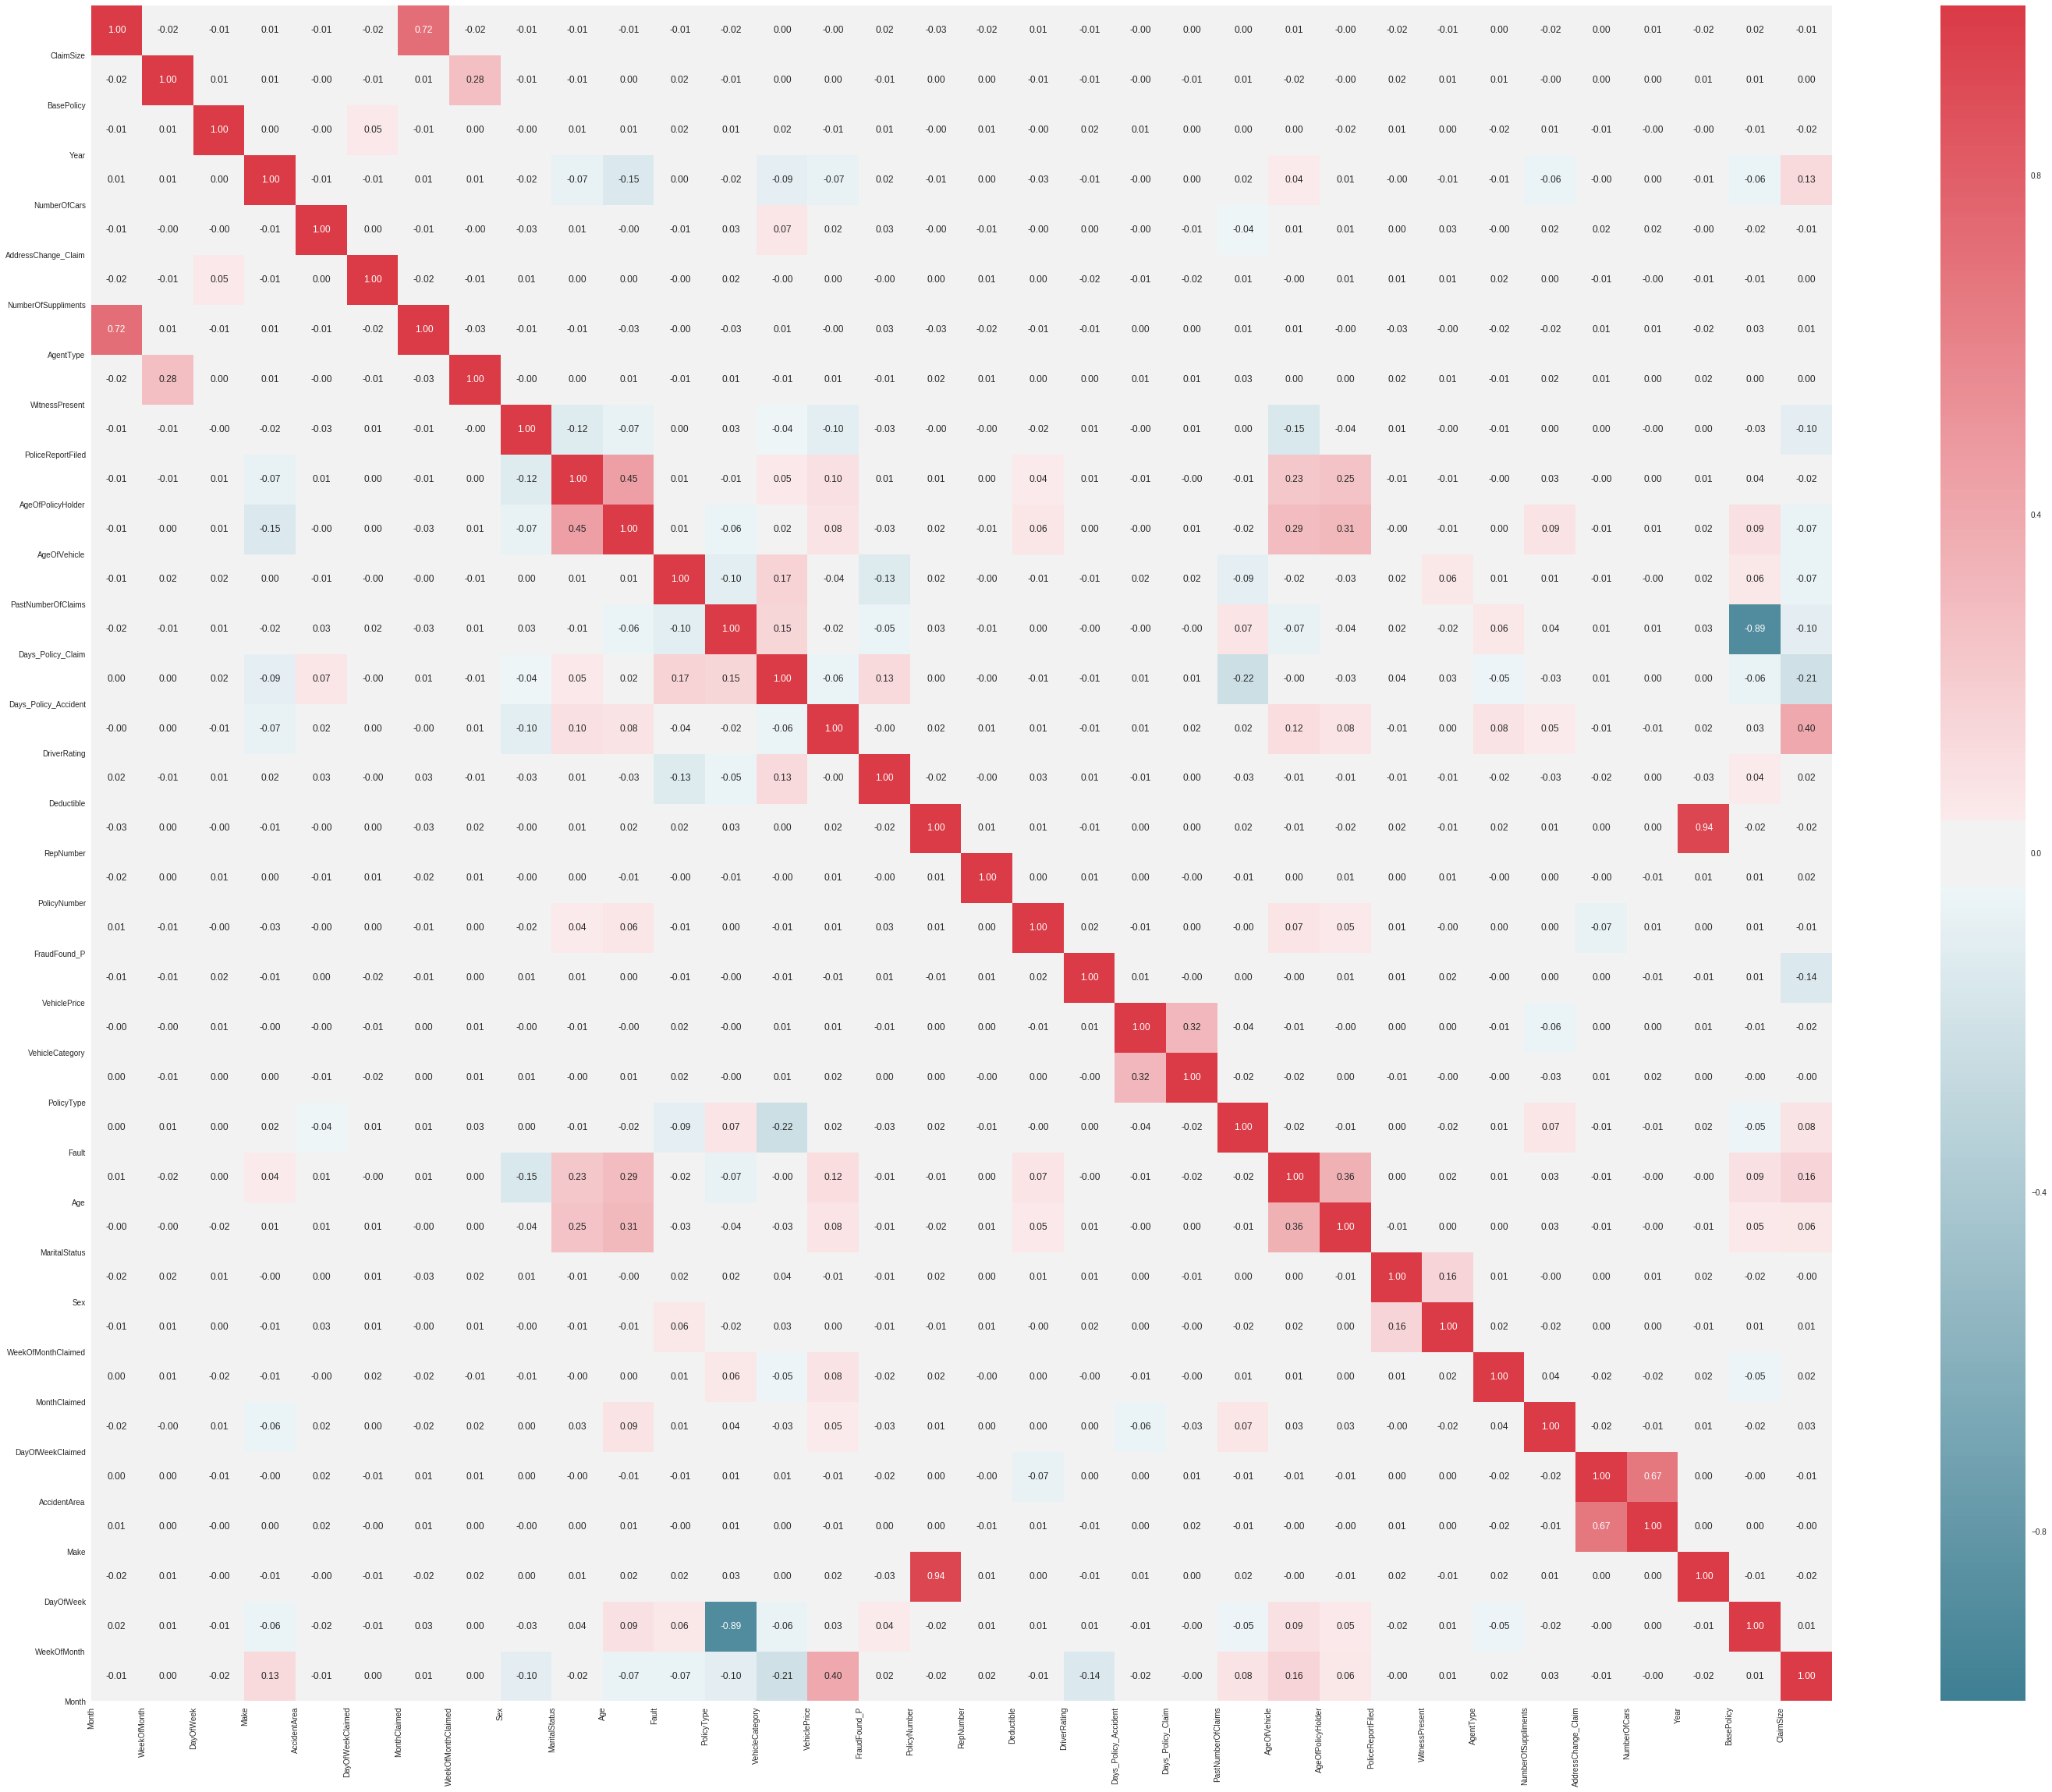

In [36]:
def heatMap(df):
#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(50, 40))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
heatMap(df)

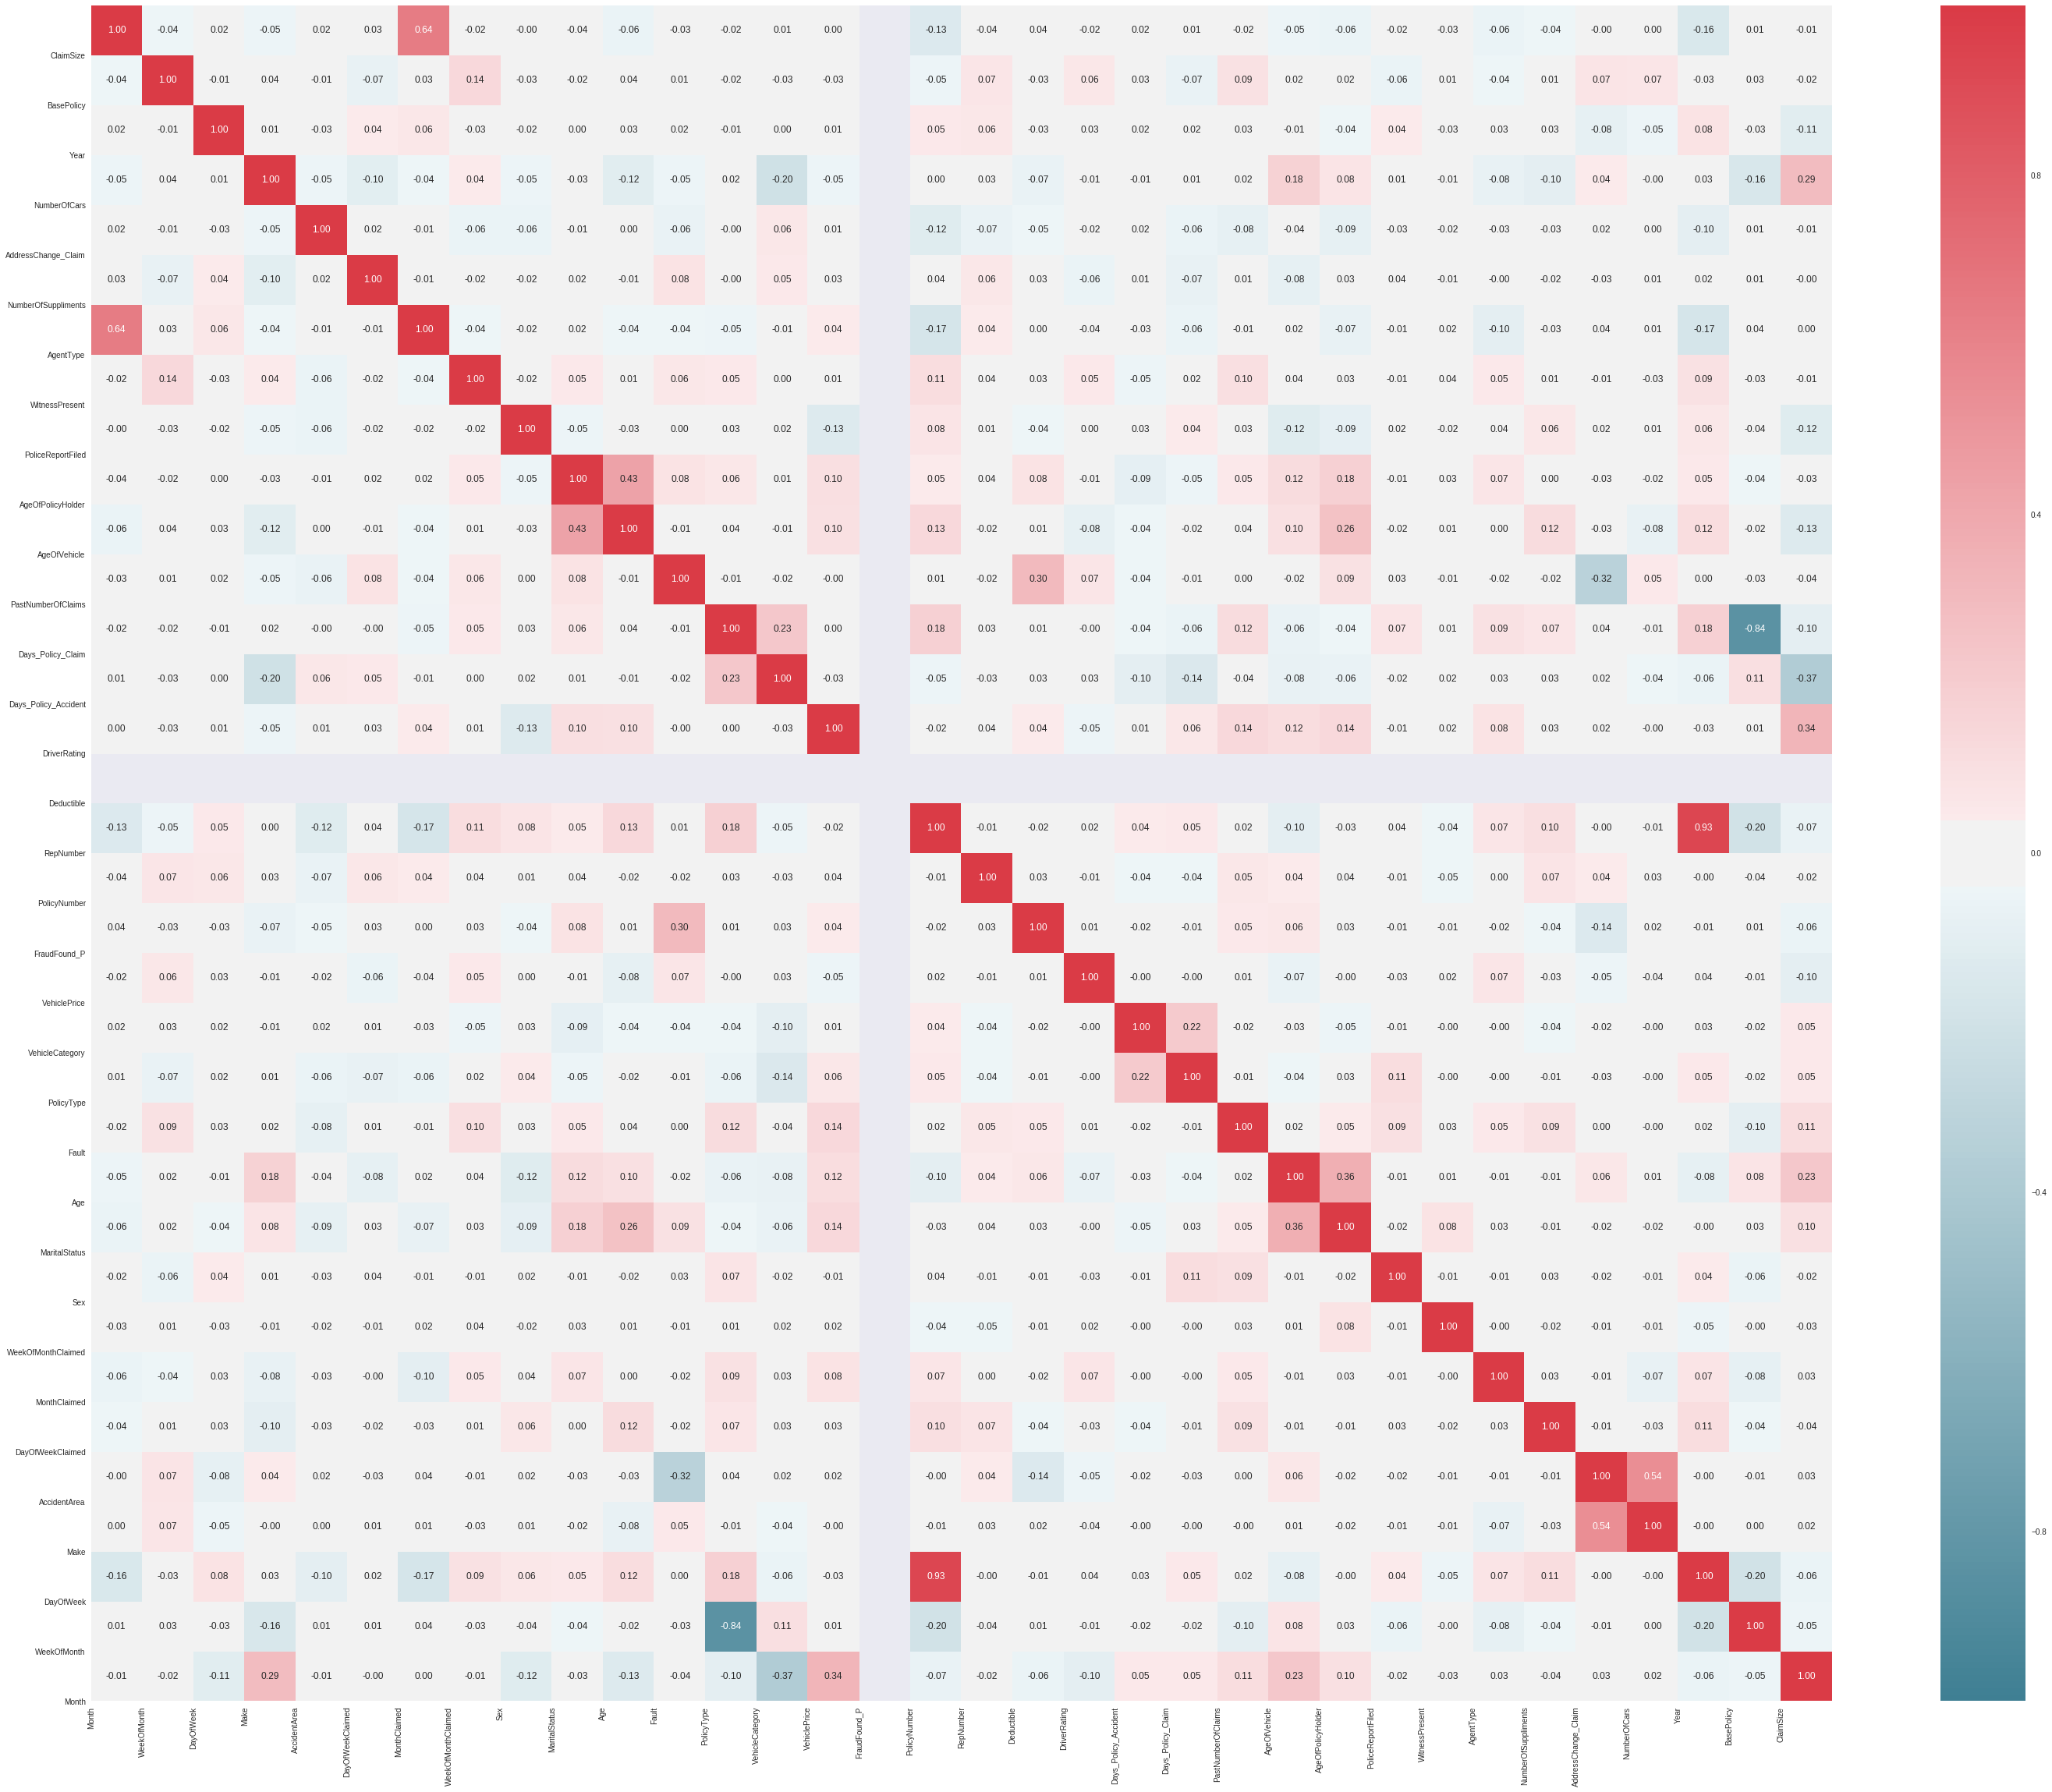

In [37]:
heatMap(positivefraud)

In [0]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels = list(df)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.2,-.4,-.5,-.6,-.8,.2,.4,.5,.6,.8,1,0])
    plt.show()






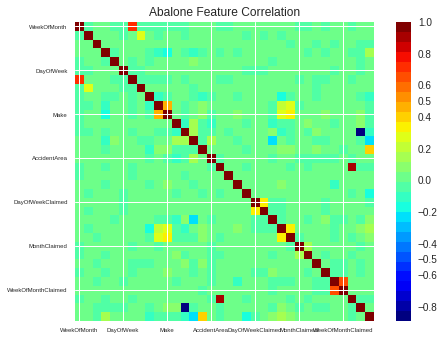

In [55]:
correlation_matrix(df)

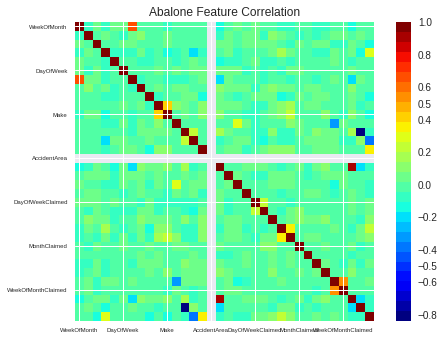

In [56]:
correlation_matrix(positivefraud)

In [73]:
headers = ['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy',
 'ClaimSize']

train_x, test_x, train_y, test_y = train_test_split(df[headers], df['FraudFound_P'], train_size=.8)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [75]:
    print ("Train_x Shape :: ", train_x.shape)
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)
    print ("Test_y Shape :: ", test_y.shape)
    
    

    print ("Train_y group\n", train_y.value_counts())
 
    print ("Test_y group\n", test_y.value_counts())

Train_x Shape ::  (9243, 33)
Train_y Shape ::  (9243,)
Test_x Shape ::  (2311, 33)
Test_y Shape ::  (2311,)
Train_y group
 0    8689
1     554
Name: FraudFound_P, dtype: int64
Test_y group
 0    2180
1     131
Name: FraudFound_P, dtype: int64


In [76]:
    clf = RandomForestClassifier()
    trained_model = clf.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
predictions = trained_model.predict(test_x)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
    print ("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
    print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
    print (" Confusion matrix \n", confusion_matrix(test_y, predictions))

Train Accuracy ::  0.987990912041545
Test Accuracy  ::  0.9402855906533968
 Confusion matrix 
 [[2172    8]
 [ 130    1]]


In [81]:
pred_df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRI-tE9NCmHL-VFImPTAtzAO9UiQvToRURRMmkPFP4Uh5YxMExXISokYpFtsS15eBOtDLxvYFlTm1Sx/pub?output=xlsx')
pred_df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,56711.16
1,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,60746.44
2,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,74173.64
3,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,2482.01
4,Apr,4,Monday,Honda,Urban,Tuesday,May,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1994,Liability,88101.03
5,Aug,3,Sunday,Mazda,Urban,Thursday,Aug,5,Male,Married,...,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1994,Liability,56274.98
6,Jun,3,Saturday,Pontiac,Urban,Tuesday,Jun,3,Male,Single,...,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Liability,64579.36
7,Sep,3,Friday,Mazda,Urban,Friday,Sep,3,Male,Married,...,36 to 40,Yes,No,External,none,no change,1 vehicle,1994,All Perils,58466.53
8,May,3,Sunday,Accura,Urban,Friday,May,4,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils,77669.21
9,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,64322.08


In [82]:
pred_df = handle_non_numerical_data(pred_df)
print(pred_df.head())

   Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0      8            5          4    16             0                 2   
1      1            4          3    16             0                 0   
2      5            1          3    16             0                 2   
3     11            3          2     0             0                 0   
4     11            4          4    16             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus    ...      \
0            10                   2    1              0    ...       
1             5                   1    0              0    ...       
2             4                   4    0              0    ...       
3            11                   3    0              2    ...       
4             6                   1    0              2    ...       

   AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  AgentType  \
0                  0                  0               0         

In [84]:
result = trained_model.predict(pred_df)
result

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
pred_df['FraudFound_P'] = result

In [90]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 34 columns):
Month                   3855 non-null int64
WeekOfMonth             3855 non-null int64
DayOfWeek               3855 non-null int64
Make                    3855 non-null int64
AccidentArea            3855 non-null int64
DayOfWeekClaimed        3855 non-null int64
MonthClaimed            3855 non-null int64
WeekOfMonthClaimed      3855 non-null int64
Sex                     3855 non-null int64
MaritalStatus           3855 non-null int64
Age                     3855 non-null int64
Fault                   3855 non-null int64
PolicyType              3855 non-null int64
VehicleCategory         3855 non-null int64
VehiclePrice            3855 non-null int64
PolicyNumber            3855 non-null int64
RepNumber               3855 non-null int64
Deductible              3855 non-null int64
DriverRating            3855 non-null int64
Days_Policy_Accident    3855 non-null int64
Days_Policy_C

In [0]:
pred_df.to_csv("out.csv", index=False)

In [99]:
!ls

out.csv  sample_data
